# Converting iEEG Data to BIDS format

The Brain Imaging Data Structure (BIDS) is a community-driven specification for organizing neuroscience data and metadata with the aim to make datasets more transparent, reusable, and reproducible. Intracranial electroencephalography (iEEG) data offer a unique combination of high spatial and temporal resolution measurements of the living human brain. To improve internal (re)use and external sharing of these unique data, we present a specification for storing and sharing iEEG data: iEEG-BIDS. [Holdgraf et al., 2019](https://www.nature.com/articles/s41597-019-0105-7)

#### MNE BIDS
https://mne.tools/mne-bids/stable/index.html  
https://mne.tools/mne-bids/dev/auto_examples/convert_ieeg_to_bids.html

#### Basic pipeline
1. import data
2. construct instance of MNE Raw
3. covert to iEEG-BIDS using MNE-BIDS

Here we show how to convert to iEEG-BIDS from .mat and .edf

#### convert RAS coordinates to MNI space
https://surfer.nmr.mgh.harvard.edu/fswiki/CoordinateSystems

In [1]:
# imports
import numpy as np
import scipy.io as sio
import pandas as pd
import mne
import mne_bids

## .EDF to iEEG-BIDS

In [2]:
subj = '1002'
sdID = 'SD021'

# file paths
root = '/Users/sydneysmith/Projects/PrOPHEcy/iEEG_'
edf_path = root+subj+'/PrOPHEcy_'+subj+'.edf/'

coord_path = root+subj+'/RAS/'+sdID+'_contact_RAS.csv'
vol_path = root+subj+'/RAS/'+sdID+'_SEEG_volumetric_labels.csv'

In [3]:
# load files
raw = mne.io.read_raw_edf(edf_path) # .edf with iEEG data
RAS_coords = pd.read_csv(coord_path) # .csv with RAS coordinates
vol_desc = pd.read_csv(vol_path) # .csv with volumetric descriptions

Extracting EDF parameters from /Users/sydneysmith/Projects/PrOPHEcy/iEEG_1002/PrOPHEcy_1002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Using matplotlib as 2D backend.


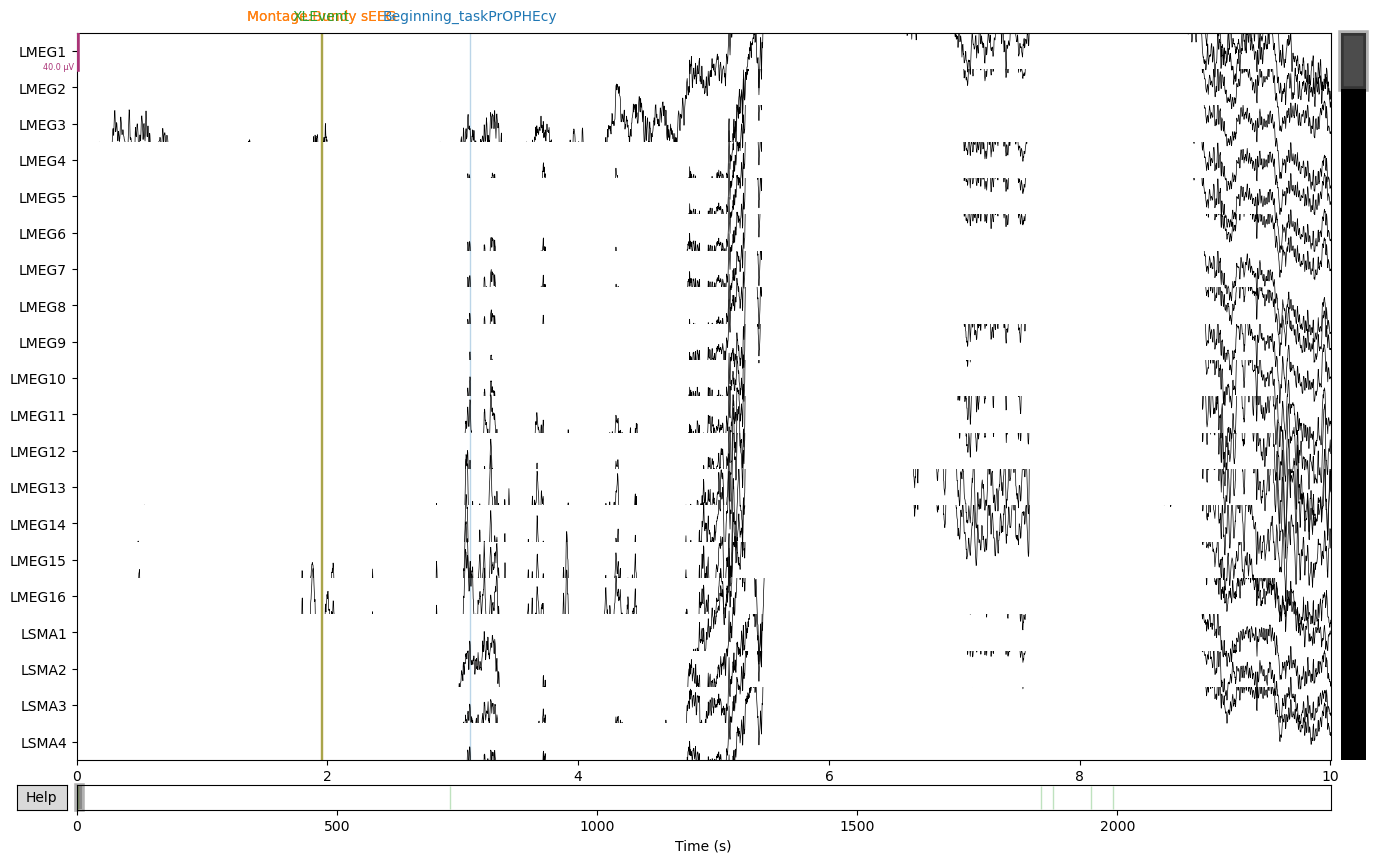

Channels marked as bad: none


In [4]:
%matplotlib qt
raw.plot()

In [5]:
RAS_coords

,label,contact,R,A,S
0,RFAC,1,5.7346,41.1371,-10.1760
1,RFAC,2,6.8995,40.8368,-7.1094
2,RFAC,3,9.3098,40.3052,-3.6574
3,RFAC,4,11.5146,39.1084,0.0817
4,RFAC,5,12.8932,38.8488,3.6007
...,...,...,...,...,...
137,LMEG,12,-42.5969,11.1211,23.2839
138,LMEG,13,-45.3090,12.2171,21.2318
139,LMEG,14,-48.8869,12.7647,19.4711
140,LMEG,15,-51.7232,12.8643,18.1427


In [6]:
# identify non-iEEG channels
misc_chans = ['C63', 'C64', 'C164', 'C165', 'C166', 'C167', 'C168', 'C169', 'C170',
              'C171', 'C172', 'C173', 'C174', 'C175', 'C176', 'C177', 'C178',
              'C179', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186',
              'C187', 'C188', 'C189', 'C190', 'C191', 'C192', 'C193', 'C194',
              'C195', 'C196', 'C197', 'C198', 'C199', 'C200', 'C201', 'C202',
              'C203', 'C204', 'C205', 'C206', 'C207', 'C208', 'C209', 'C210',
              'C211', 'C212', 'C213', 'C214', 'C215', 'C216', 'C217', 'C218', 'C219', 'C220', 'C221', 'C222', 'C223', 'C224', 'C225',
 'C226', 'C227', 'C228', 'C229', 'C230', 'C231', 'C232', 'C233',
 'C234', 'C235', 'C236', 'C237', 'C238', 'C239', 'C240', 'C241',
 'C242', 'C243', 'C244', 'C245', 'C246', 'C247', 'C248',
 'C249', 'C250', 'C251', 'C252', 'C253', 'C254', 'C255', 'C256']
ecg_chans = ['EKG1', 'EKG2', 'EKG3', 'EKG4']
eeg_chans = ['T3', 'T4', 'T5', 'T6', 'O1', 'O2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'Fz', 'Cz', 'Pz']
stim_chans = ['TRIG', 'DC1']

In [7]:
raw.info['ch_names']

['LMEG1',
 'LMEG2',
 'LMEG3',
 'LMEG4',
 'LMEG5',
 'LMEG6',
 'LMEG7',
 'LMEG8',
 'LMEG9',
 'LMEG10',
 'LMEG11',
 'LMEG12',
 'LMEG13',
 'LMEG14',
 'LMEG15',
 'LMEG16',
 'LSMA1',
 'LSMA2',
 'LSMA3',
 'LSMA4',
 'LSMA5',
 'LSMA6',
 'LSMA7',
 'LSMA8',
 'LSMA9',
 'LSMA10',
 'LSMA11',
 'LSMA12',
 'LSMA13',
 'LSMA14',
 'LPPV1',
 'LPPV2',
 'LPPV3',
 'LPPV4',
 'LPPV5',
 'LPPV6',
 'LPPV7',
 'LPPV8',
 'LPPV9',
 'LPPV10',
 'LPPV11',
 'LPPV12',
 'LPPV13',
 'LPPV14',
 'LPPV15',
 'LPPV16',
 'LTH1',
 'LTH2',
 'LTH3',
 'LTH4',
 'LTH5',
 'LTH6',
 'LTH7',
 'LTH8',
 'LTH9',
 'LTH10',
 'LTH11',
 'LTH12',
 'LTH13',
 'LTH14',
 'LTH15',
 'LTH16',
 'C63',
 'C64',
 'LMEGOF1',
 'LMEGOF2',
 'LMEGOF3',
 'LMEGOF4',
 'LMEGOF5',
 'LMEGOF6',
 'LMEGOF7',
 'LMEGOF8',
 'LMEGOF9',
 'LMEGOF10',
 'LMEGOF11',
 'LMEGOF12',
 'LMEGOF13',
 'LMEGOF14',
 'LMEGOF15',
 'LMEGOF16',
 'RTH1',
 'RTH2',
 'RTH3',
 'RTH4',
 'RTH5',
 'RTH6',
 'RTH7',
 'RTH8',
 'RTH9',
 'RTH10',
 'RTH11',
 'RTH12',
 'RTH13',
 'RTH14',
 'RTH15',
 'RTH16',
 'RS

In [11]:
# set channel types
ch_labels = raw.info['ch_names']
ch_types = list(list(np.tile('seeg', ch_labels.index('C63'))) + \
                list(np.tile('misc', ch_labels.index('LMEGOF1')-ch_labels.index('C63'))) + \
                list(np.tile('seeg', ch_labels.index('EKG1')-ch_labels.index('LMEGOF1'))) + \
                list(np.tile('ecg', ch_labels.index('T3')-ch_labels.index('EKG1'))) + \
                list(np.tile('eeg', ch_labels.index('C164')-ch_labels.index('T3'))) + \
                list(np.tile('misc', ch_labels.index('DC1')-ch_labels.index('C164'))) + \
                list(np.tile('stim', 2))) #list(np.tile('misc', ch_labels.index('DC1')-ch_labels.index('EKG1'))) + \
chan_type_dict = dict(zip(ch_labels, ch_types))

In [12]:
chan_type_dict

{'LMEG1': 'seeg',
 'LMEG2': 'seeg',
 'LMEG3': 'seeg',
 'LMEG4': 'seeg',
 'LMEG5': 'seeg',
 'LMEG6': 'seeg',
 'LMEG7': 'seeg',
 'LMEG8': 'seeg',
 'LMEG9': 'seeg',
 'LMEG10': 'seeg',
 'LMEG11': 'seeg',
 'LMEG12': 'seeg',
 'LMEG13': 'seeg',
 'LMEG14': 'seeg',
 'LMEG15': 'seeg',
 'LMEG16': 'seeg',
 'LSMA1': 'seeg',
 'LSMA2': 'seeg',
 'LSMA3': 'seeg',
 'LSMA4': 'seeg',
 'LSMA5': 'seeg',
 'LSMA6': 'seeg',
 'LSMA7': 'seeg',
 'LSMA8': 'seeg',
 'LSMA9': 'seeg',
 'LSMA10': 'seeg',
 'LSMA11': 'seeg',
 'LSMA12': 'seeg',
 'LSMA13': 'seeg',
 'LSMA14': 'seeg',
 'LPPV1': 'seeg',
 'LPPV2': 'seeg',
 'LPPV3': 'seeg',
 'LPPV4': 'seeg',
 'LPPV5': 'seeg',
 'LPPV6': 'seeg',
 'LPPV7': 'seeg',
 'LPPV8': 'seeg',
 'LPPV9': 'seeg',
 'LPPV10': 'seeg',
 'LPPV11': 'seeg',
 'LPPV12': 'seeg',
 'LPPV13': 'seeg',
 'LPPV14': 'seeg',
 'LPPV15': 'seeg',
 'LPPV16': 'seeg',
 'LTH1': 'seeg',
 'LTH2': 'seeg',
 'LTH3': 'seeg',
 'LTH4': 'seeg',
 'LTH5': 'seeg',
 'LTH6': 'seeg',
 'LTH7': 'seeg',
 'LTH8': 'seeg',
 'LTH9': 'seeg',


In [13]:
raw = raw.set_channel_types(chan_type_dict)

/var/folders/96/g2_ml18s7v1cqm0wh8_8n5bh0000gn/T/ipykernel_7619/3670942396.py:1: RuntimeWarning: The unit for channel(s) DC1, TRIG has changed from V to NA.
  raw = raw.set_channel_types(chan_type_dict)


In [14]:
# add column of ones for matrix multiplication
ones = np.ones(len(RAS_coords['R'].values))
RAS_coords['1'] = ones

In [15]:
# merge 'contact' and 'label' columns into complete channel label name
contacts = list(RAS_coords['contact'].values.astype(str))
labels = list(RAS_coords['label'].values)
zip_dict = zip(labels, contacts)
RAS_coords['chan_labels'] = list(label+contact for label,contact in zip_dict)

# sort RAS cordinates into order of channels in iEEG .edf file
sorted_RAS = pd.DataFrame()

for chan in raw.info['ch_names']:
    row = RAS_coords[RAS_coords['chan_labels']==chan]
    sorted_RAS = sorted_RAS.append(row, ignore_index=True)

In [16]:
sorted_RAS

,label,contact,R,A,S,1,chan_labels
0,LMEG,1,-10.2005,3.8406,40.7578,1.0,LMEG1
1,LMEG,2,-12.7616,5.1167,39.0293,1.0,LMEG2
2,LMEG,3,-14.4735,5.5179,37.4817,1.0,LMEG3
3,LMEG,4,-17.6073,5.7068,35.9013,1.0,LMEG4
4,LMEG,5,-21.4393,6.9507,34.4637,1.0,LMEG5
...,...,...,...,...,...,...,...
137,RFAC,12,25.9771,34.3508,28.1832,1.0,RFAC12
138,RFAC,13,28.1243,33.4561,31.4394,1.0,RFAC13
139,RFAC,14,30.3209,32.8839,34.4391,1.0,RFAC14
140,RFAC,15,31.8749,32.8662,38.0886,1.0,RFAC15


In [17]:
# conversion matrix from link (see intro)
M = np.mat([[0.9975, -0.0073, 0.0176, -0.0429],
            [0.0146, 1.0009, -0.0024, 1.5496],
            [-0.0130, -0.0093, 0.9971, 1.1840]])

# RAS --> MNI transform
RAS = np.mat(sorted_RAS[['R', 'A', 'S', '1']].values)
MNI = np.matmul(M,RAS.T)
MNI = MNI.T
MNI_array = np.asarray(MNI)
MNI_array # MNI coordinate array

array([[ -9.52859785,   5.14691052,  41.9204913 ],
       [-12.12303223,   6.39091535,  40.21843052],
       [-13.860819  ,   6.77119693,  38.6938421 ],
       [-17.01597851,   6.91830642,  37.15700789],
       [-20.87278074,   8.11082897,  35.76182466],
       [-23.2039469 ,   7.68565875,  34.6150676 ],
       [-27.25667022,   8.53881171,  32.72355298],
       [-29.8918213 ,   9.62513968,  30.84428155],
       [-33.26728924,  10.17324578,  29.41373486],
       [-36.16142186,  10.07703528,  27.94792349],
       [-39.01688137,  11.56435986,  26.17493958],
       [-42.20469514,  12.00291289,  24.85071016],
       [-44.95413265,  13.06522767,  22.82962575],
       [-48.5580737 ,  13.56530885,  21.1154518 ],
       [-51.41138987,  13.62677667,  19.82684978],
       [-53.81816759,  14.7611281 ,  18.23120691],
       [-14.32509877,  -4.64116706,  28.21247728],
       [-15.51046942,  -3.91535766,  30.84605538],
       [-18.70100452,  -3.36035272,  32.79840908],
       [-20.95491502,  -2.19953

In [28]:
# build raw with montage
raw_copy = raw.copy()
#raw_copy.drop_channels(bad_chans)

# dictionary with channel names and MNI coords
chan_dict = dict()

for ind, chan in enumerate(raw_copy.pick_types(seeg=True).info['ch_names']):
    chan_dict[chan] = np.array(MNI_array[ind])

# create montage object
montage = mne.channels.make_dig_montage(ch_pos=chan_dict, coord_frame='mni_tal')

# add montage to raw
raw.set_montage(montage, on_missing='ignore')

/var/folders/96/g2_ml18s7v1cqm0wh8_8n5bh0000gn/T/ipykernel_7619/635051343.py:15: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(montage, on_missing='ignore')


<RawEDF | PrOPHEcy_1002.edf, 258 x 1234048 (2410.2 s), ~296 kB, data not loaded>

In [33]:
coord_chans = list(sorted_RAS['chan_labels'].values)
all_chans = list(chan_type_dict.keys())
# RHB2, 3, 6, 8, 9, 11, 12, 13, 14, 15, 16
# LA1, 2, 3, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16

In [32]:
# update values in chan type dict to turn missing RAS chans into 'misc' channels to remove from plotting/analysis


sorted_RAS['chan_labels'].values

array(['RHT1', 'RHT2', 'RHT3', 'RHT4', 'RHT5', 'RHT6', 'RHT7', 'RHT8',
       'RHT9', 'RHT10', 'RHT11', 'RHT12', 'RHT13', 'RHT14', 'RHT15',
       'RHT16', 'RHH1', 'RHH2', 'RHH3', 'RHH4', 'RHH5', 'RHH6', 'RHH7',
       'RHH8', 'RHH9', 'RHH10', 'RHH11', 'RHH12', 'RHH13', 'RHH14',
       'RHB1', 'RHB4', 'RHB5', 'RHB7', 'RA1', 'RA2', 'RA3', 'RA4', 'RA5',
       'RA6', 'RA7', 'RA8', 'RA9', 'RA10', 'RA11', 'RA12', 'RA13', 'RA14',
       'RCA1', 'RCA2', 'RCA3', 'RCA4', 'RCA5', 'RCA6', 'RCA7', 'RCA8',
       'RCA9', 'RCA10', 'RCA11', 'RCA12', 'RCA13', 'RCA14', 'RCA15',
       'RCA16', 'RFO1', 'RFO2', 'RFO3', 'RFO4', 'RFO5', 'RFO6', 'RFO7',
       'RFO8', 'RFO9', 'RFO10', 'RFO11', 'RFO12', 'RFO13', 'RFO14',
       'RFO15', 'RFO16', 'RFM1', 'RFM2', 'RFM3', 'RFM4', 'RFM5', 'RFM6',
       'RFM7', 'RFM8', 'RFM9', 'RFM10', 'RFM11', 'RFM12', 'RFM13',
       'RFM14', 'RFM15', 'RFM16', 'LHH1', 'LHH2', 'LHH3', 'LHH4', 'LHH5',
       'LHH6', 'LHH7', 'LHH8', 'LHH9', 'LHH10', 'LHH11', 'LHH12', 'LHH13',
  

In [23]:
list(chan_type_dict.keys())

['Trigger Event',
 'RHT1',
 'RHT2',
 'RHT3',
 'RHT4',
 'RHT5',
 'RHT6',
 'RHT7',
 'RHT8',
 'RHT9',
 'RHT10',
 'RHT11',
 'RHT12',
 'RHT13',
 'RHT14',
 'RHT15',
 'RHT16',
 'RHH1',
 'RHH2',
 'RHH3',
 'RHH4',
 'RHH5',
 'RHH6',
 'RHH7',
 'RHH8',
 'RHH9',
 'RHH10',
 'RHH11',
 'RHH12',
 'RHH13',
 'RHH14',
 'RHB1',
 'RHB2',
 'RHB3',
 'RHB4',
 'RHB5',
 'RHB6',
 'RHB7',
 'RHB8',
 'RHB9',
 'RHB10',
 'RHB11',
 'RHB12',
 'RHB13',
 'RHB14',
 'RHB15',
 'RHB16',
 'RA1',
 'RA2',
 'RA3',
 'RA4',
 'RA5',
 'RA6',
 'RA7',
 'RA8',
 'RA9',
 'RA10',
 'RA11',
 'RA12',
 'RA13',
 'RA14',
 'C61',
 'C62',
 'C63',
 'C64',
 'RCA1',
 'RCA2',
 'RCA3',
 'RCA4',
 'RCA5',
 'RCA6',
 'RCA7',
 'RCA8',
 'RCA9',
 'RCA10',
 'RCA11',
 'RCA12',
 'RCA13',
 'RCA14',
 'RCA15',
 'RCA16',
 'RFO1',
 'RFO2',
 'RFO3',
 'RFO4',
 'RFO5',
 'RFO6',
 'RFO7',
 'RFO8',
 'RFO9',
 'RFO10',
 'RFO11',
 'RFO12',
 'RFO13',
 'RFO14',
 'RFO15',
 'RFO16',
 'RFM1',
 'RFM2',
 'RFM3',
 'RFM4',
 'RFM5',
 'RFM6',
 'RFM7',
 'RFM8',
 'RFM9',
 'RFM10',
 'RFM11

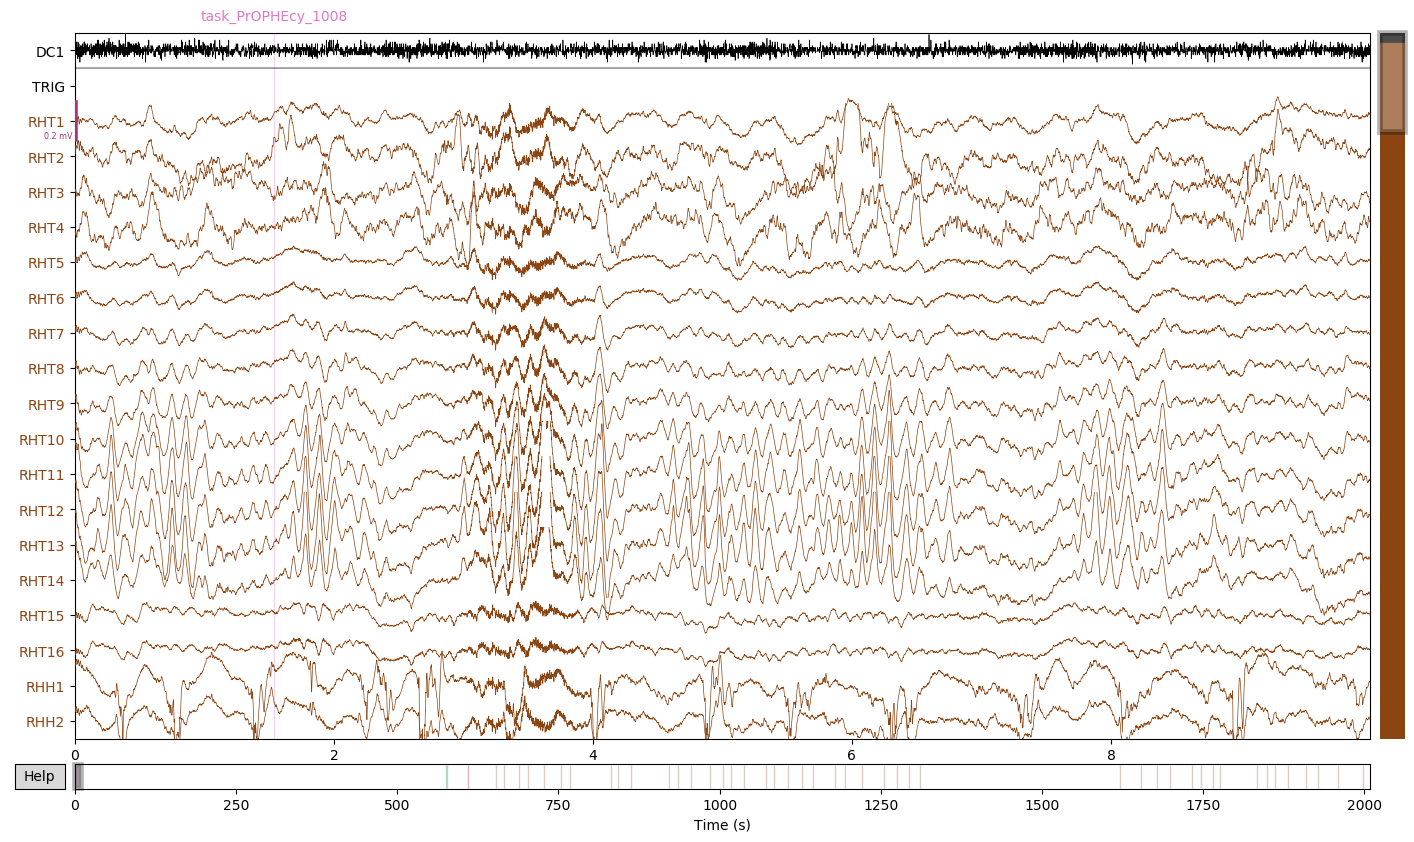

In [46]:
raw.pick_types(seeg=True, stim=True)
raw.plot()

In [47]:
#raw.save('1002_raw.fif')

Writing /Users/sydneysmith/Projects/iEEGPreprocessing/1008_raw.fif
Closing /Users/sydneysmith/Projects/iEEGPreprocessing/1008_raw.fif
[done]
Channels marked as bad: none
Channels marked as bad: none


In [29]:
# construct instance of BIDSPath()
bids_path = mne_bids.BIDSPath(subject=subj,
                  task='PrOPHEcy',
                  datatype='ieeg',
                  root='/Users/sydneysmith/Projects/PrOPHEcy/iEEG_BIDS/')

In [30]:
# bug = can't recognize .edf file format
mne_bids.write_raw_bids(raw, bids_path, overwrite=True)

Extracting EDF parameters from /Users/sydneysmith/Projects/PrOPHEcy/iEEG_1002/PrOPHEcy_1002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Writing '/Users/sydneysmith/Projects/PrOPHEcy/iEEG_BIDS/participants.tsv'...
Writing '/Users/sydneysmith/Projects/PrOPHEcy/iEEG_BIDS/participants.json'...
Writing electrodes file to... /Users/sydneysmith/Projects/PrOPHEcy/iEEG_BIDS/sub-1002/ieeg/sub-1002_electrodes.tsv
Writing coordsytem file to... /Users/sydneysmith/Projects/PrOPHEcy/iEEG_BIDS/sub-1002/ieeg/sub-1002_coordsystem.json
Writing '/Users/sydneysmith/Projects/PrOPHEcy/iEEG_BIDS/sub-1002/ieeg/sub-1002_space-fsaverage_electrodes.tsv'...
Writing '/Users/sydneysmith/Projects/PrOPHEcy/iEEG_BIDS/sub-1002/ieeg/sub-1002_space-fsaverage_coordsystem.json'...
Used Annotations descriptions: ['Beginning_taskPrOPHEcy', 'Montage:Bundy sEEG', 'XLEvent']
Writing '/Users/sydneysmith/Projects/PrOPHEcy/iEEG_BIDS/sub-1002/ieeg/sub-1002_task-PrOPHEcy_events.tsv'...
Wr

BIDSPath(
root: /Users/sydneysmith/Projects/PrOPHEcy/iEEG_BIDS
datatype: ieeg
basename: sub-1002_task-PrOPHEcy_ieeg.edf)

## .mat to iEEG-BIDS

In [14]:
subj = '01'
sess= '03'

# import .mat files
root = '/Users/sydneysmith/Projects/BurstyShapy_260/dat/'
path = root+'Data_Subject_'+subj+'_Session_'+sess+'.mat'


dat = sio.loadmat(path)
mni_1 = dat['ecog_electr_info'][0][0][0]
mni_2 = dat['ecog_electr_info'][0][0][1]
mni_3 = dat['ecog_electr_info'][0][0][2]
chan_label = dat['ecog_electr_info'][0][0][3] # electrode lables (shank ID+contact number)
chan_desc = dat['ecog_electr_info'][0][0][4] # electrode location descriptions

set_size = dat['event'][0][0][0]
match = dat['event'][0][0][1]
correct = dat['event'][0][0][2]
probe = dat['event'][0][0][3]

lfp = dat['ecog_data']
fs = int(dat['ecog_fs'])

In [15]:
chan_dict = dict()

for ind, chan in enumerate(chan_label):
    chan_dict[chan] = np.array((float(mni_1[ind]), float(mni_2[ind]), float(mni_3[ind])))
    

In [16]:
info = mne.create_info(ch_names = list(chan_label), sfreq = fs, ch_types = np.tile('ecog', len(chan_label))) 

In [17]:
epochs = np.transpose(lfp, (2,0,1))

In [18]:
montage = mne.channels.make_dig_montage(ch_pos=chan_dict, coord_frame='mni_tal')

In [19]:
raw_lfp = mne.EpochsArray(data=epochs, info=info)

Not setting metadata
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [20]:
raw_lfp.set_montage(montage)

<ipython-input-20-0860ac4d44f0>:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw_lfp.set_montage(montage)


Number of events,50
Events,1: 50
Time range,0.000 – 8.000 sec
Baseline,off


In [21]:
mne_bids.write_raw_bids(raw_lfp, root+'Data_Subject_'+subj+'_Session_'+sess+'.bids')

ValueError: raw_file must be an instance of BaseRaw, got <class 'mne.epochs.EpochsArray'>

In [ ]:
# construct instance of MNE raw



# convert to iEEG-BIDS